In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
val = pd.read_csv("validation.csv")
test = pd.read_csv("test.csv")

y_click = train.click
y_bidprice = train.bidprice
y_payprice = train.payprice

val_click = val.click
val_bidprice = val.bidprice
val_payprice = val.payprice

original_train = train
original_test = test
original_val = val

narrow_train = original_train[['click','bidprice','payprice','advertiser']]
narrow_val = original_val[['click','bidprice','payprice','advertiser']]

In [3]:
train['weekday'] = train['weekday'] + 1
basic_stat_1 = train[train['advertiser'] == 1458]
basic_stat_2 = train[train['advertiser'] == 3358]

basic_stat_1_week = basic_stat_1.groupby(basic_stat_1['weekday']).sum()
basic_stat_2_week = basic_stat_2.groupby(basic_stat_2['weekday']).sum()

basic_stat_1_hour = basic_stat_1.groupby(basic_stat_1['hour']).sum()
basic_stat_2_hour = basic_stat_2.groupby(basic_stat_2['hour']).sum()

basic_stat_1_sv = basic_stat_1.groupby(basic_stat_1['slotvisibility']).sum()
basic_stat_2_sv = basic_stat_2.groupby(basic_stat_2['slotvisibility']).sum()

basic_stat_1_region = basic_stat_1.groupby(basic_stat_1['region']).sum()
basic_stat_2_region = basic_stat_2.groupby(basic_stat_2['region']).sum()

basic_stat_1_slot = basic_stat_1.groupby(basic_stat_1['slotwidth']).sum()
basic_stat_2_slot = basic_stat_2.groupby(basic_stat_2['slotwidth']).sum()

basic_stat_1_ade = basic_stat_1.groupby(basic_stat_1['adexchange']).sum()
basic_stat_2_ade = basic_stat_2.groupby(basic_stat_2['adexchange']).sum()

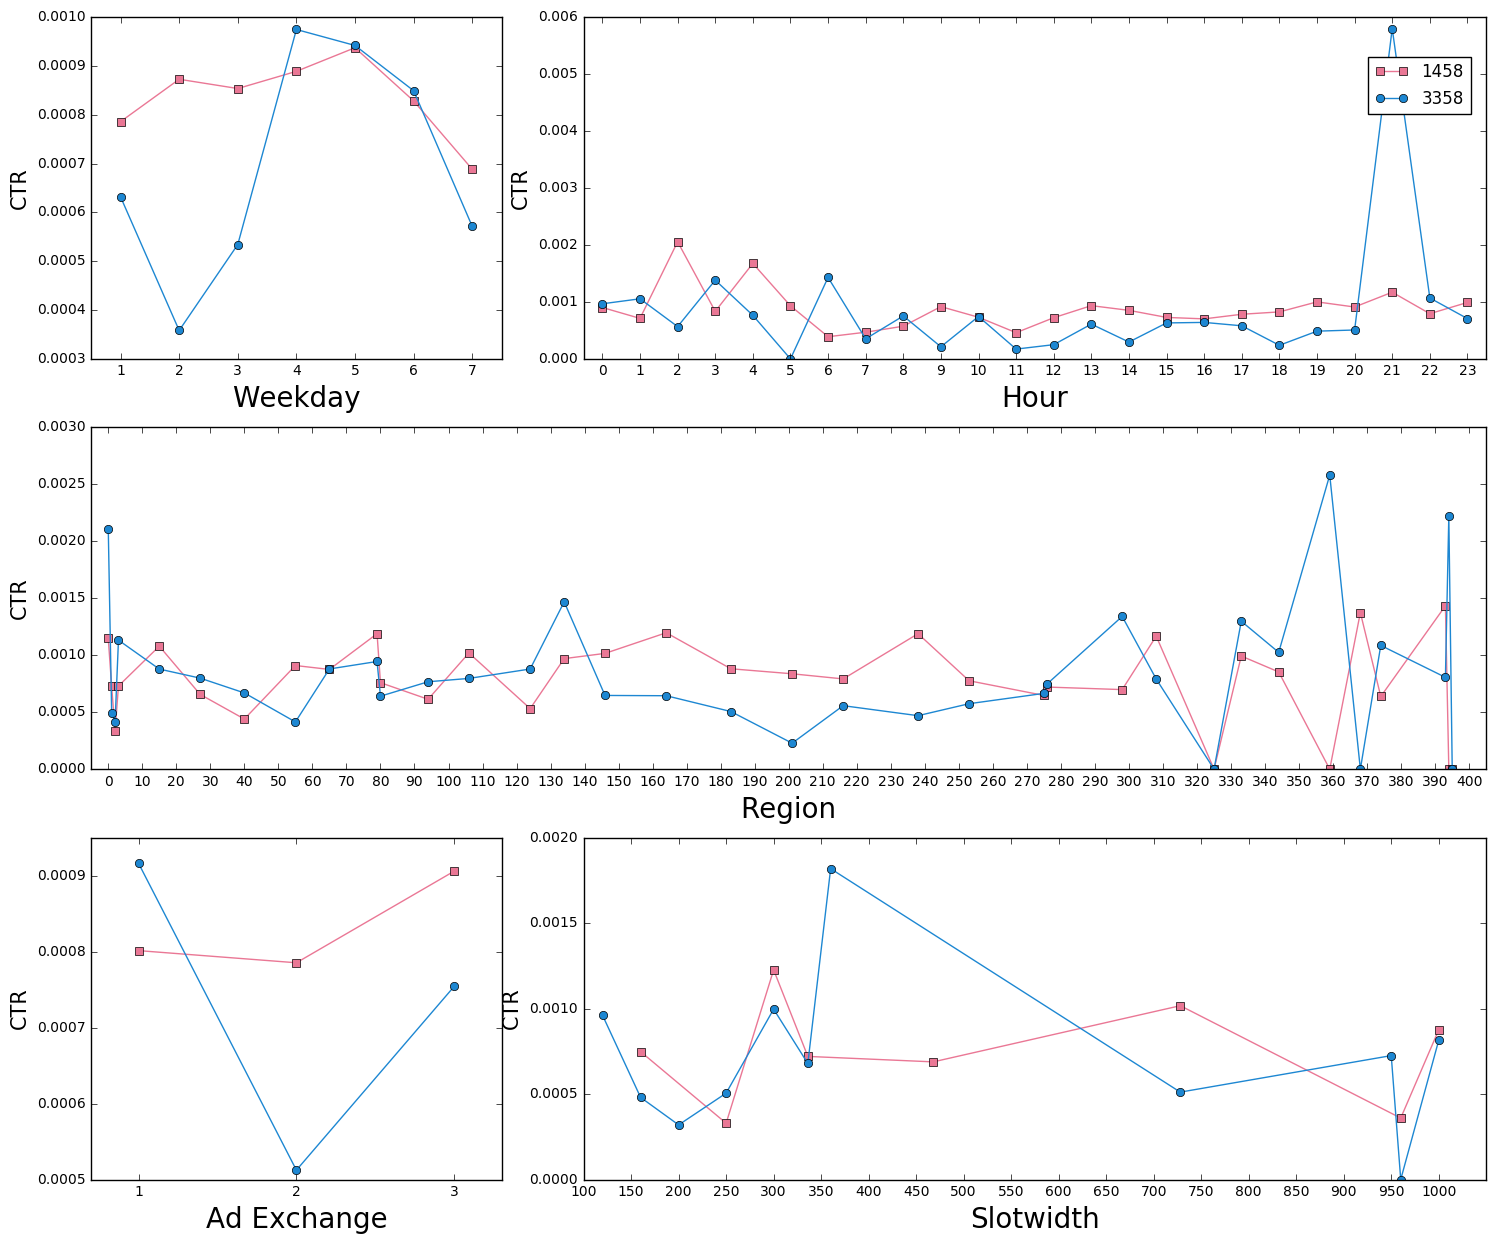

In [4]:
fig=plt.figure(figsize=(18,15))


ax1 = plt.subplot2grid((3,3), (0,0), colspan=1)
plt.plot(basic_stat_1_week['click']/basic_stat_1_week['logtype'],'s-',color='#ea7795')
plt.plot(basic_stat_2_week['click']/basic_stat_2_week['logtype'],'o-',color='#1d87d2')
plt.xlim(0.5, 7.5)
ax1.set_xlabel('Weekday', fontsize=20)
ax1.set_ylabel('CTR', fontsize=15)


ax2 = plt.subplot2grid((3,3), (0,1), colspan=2)
plt.plot(basic_stat_1_hour['click']/basic_stat_1_hour['logtype'],'s-',color='#ea7795', label="1458")
plt.plot(basic_stat_2_hour['click']/basic_stat_2_hour['logtype'],'o-',color='#1d87d2', label="3358")
plt.xlim(-0.5, 23.5)
ax2.set_xticks(range(0,24))
ax2.set_xlabel('Hour', fontsize=20)
ax2.set_ylabel('CTR', fontsize=15)
ax2.legend(loc='center left', bbox_to_anchor=(0.86, 0.8))


ax3 = plt.subplot2grid((3,2), (1, 0), colspan=3)
plt.plot(basic_stat_1_region['click']/basic_stat_1_region['logtype'],'s-',color='#ea7795')
plt.plot(basic_stat_2_region['click']/basic_stat_2_region['logtype'],'o-',color='#1d87d2')
plt.xlim(-5, 405)
ax3.set_xticks(range(0,410,10))
ax3.set_xticks(range(0,410,10))
ax3.set_xlabel('Region', fontsize=20)
ax3.set_ylabel('CTR', fontsize=15)


ax4 = plt.subplot2grid((3,3), (2, 0), colspan=1)
plt.plot(basic_stat_1_ade['click']/basic_stat_1_ade['logtype'],'s-',color='#ea7795')
plt.plot(basic_stat_2_ade['click']/basic_stat_2_ade['logtype'],'o-',color='#1d87d2')
plt.xlim(0.7, 3.3)
ax4.set_xticks([1,2,3])
ax4.set_xlabel('Ad Exchange', fontsize=20)
ax4.set_ylabel('CTR', fontsize=15)


ax5 = plt.subplot2grid((3,3), (2, 1), colspan=2)
plt.plot(basic_stat_1_slot['click']/basic_stat_1_slot['logtype'],'s-',color='#ea7795')
plt.plot(basic_stat_2_slot['click']/basic_stat_2_slot['logtype'],'o-',color='#1d87d2')
plt.xlim(100, 1050)
ax5.set_xticks(range(100,1050,50))
ax5.set_xlabel('Slotwidth', fontsize=20)
ax5.set_ylabel('CTR', fontsize=15)


# plt.savefig('fig2.eps')

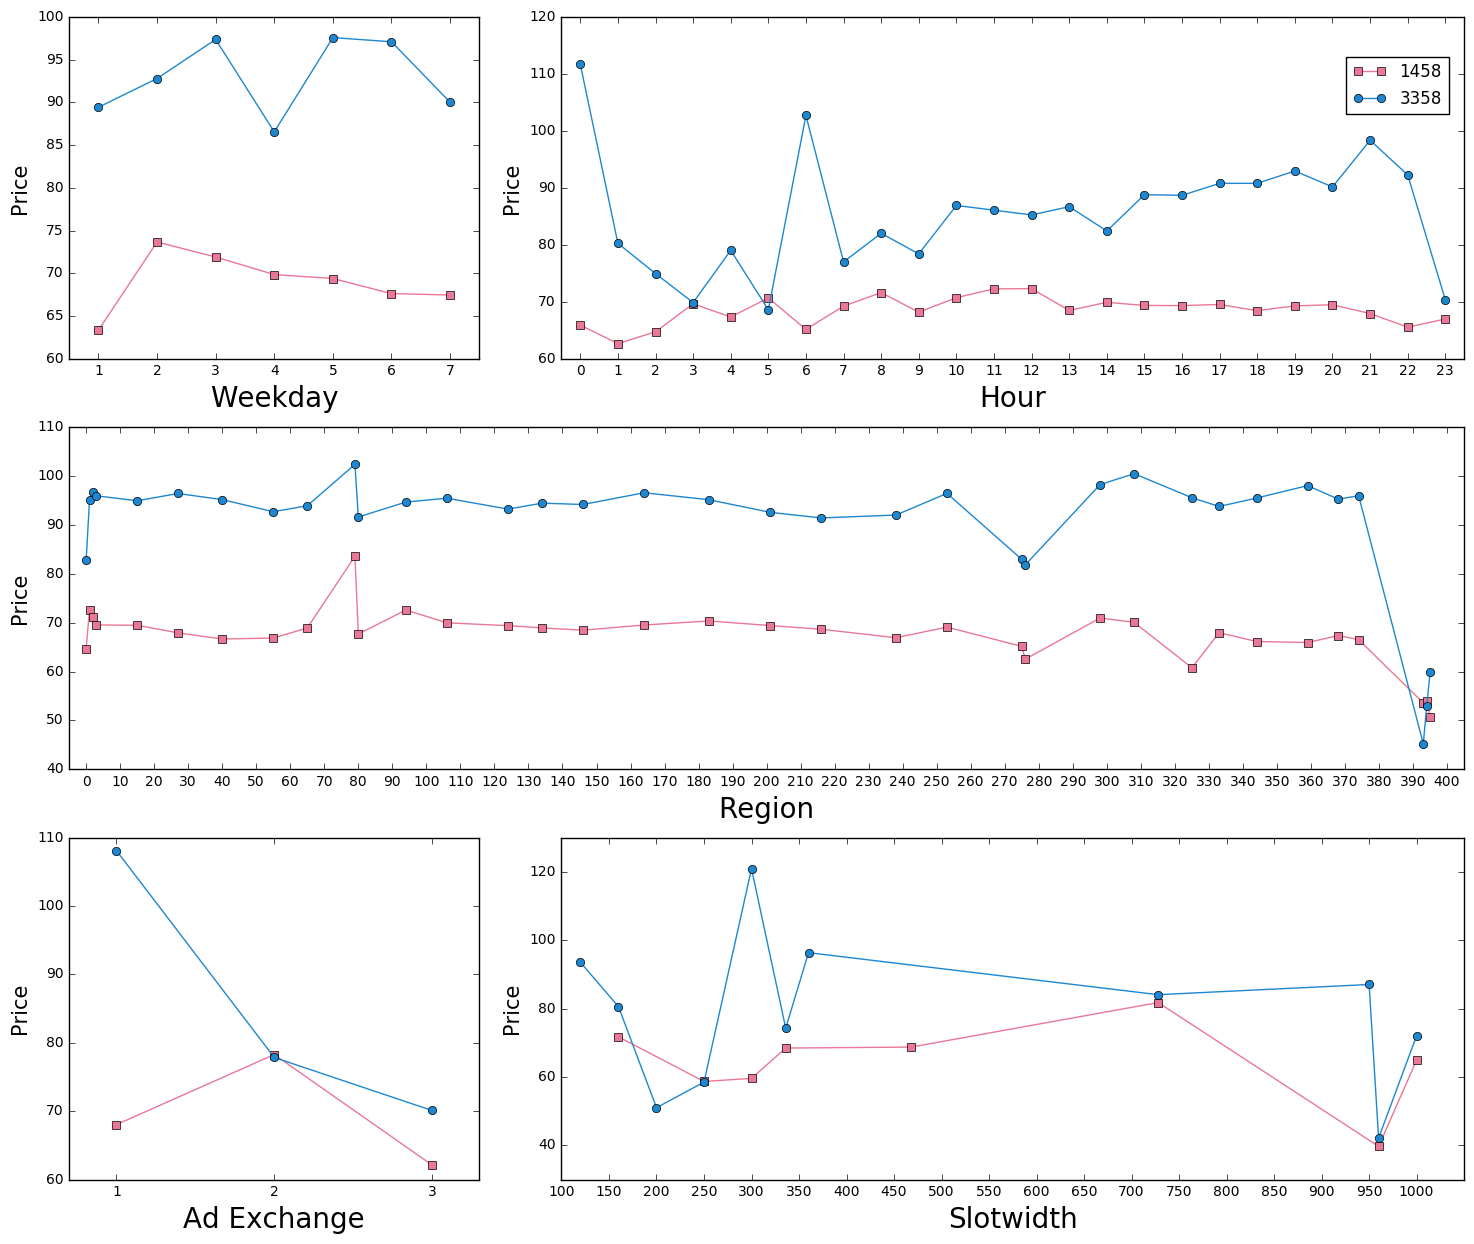

In [5]:
fig=plt.figure(figsize=(18,15))


ax1 = plt.subplot2grid((3,3), (0,0), colspan=1)
plt.plot(basic_stat_1_week['payprice']/basic_stat_1_week['logtype'],'s-',color='#ea7795')
plt.plot(basic_stat_2_week['payprice']/basic_stat_2_week['logtype'],'o-',color='#1d87d2')
plt.xlim(0.5, 7.5)
ax1.set_xlabel('Weekday', fontsize=20)
ax1.set_ylabel('Price', fontsize=15)


ax2 = plt.subplot2grid((3,3), (0,1), colspan=2)
plt.plot(basic_stat_1_hour['payprice']/basic_stat_1_hour['logtype'],'s-',color='#ea7795', label="1458")
plt.plot(basic_stat_2_hour['payprice']/basic_stat_2_hour['logtype'],'o-',color='#1d87d2', label="3358")
plt.xlim(-0.5, 23.5)
ax2.set_xticks(range(0,24,1))
ax2.set_xlabel('Hour', fontsize=20)
ax2.set_ylabel('Price', fontsize=15)
ax2.legend(loc='center left', bbox_to_anchor=(0.86, 0.8))


ax3 = plt.subplot2grid((3,2), (1, 0), colspan=3)
plt.plot(basic_stat_1_region['payprice']/basic_stat_1_region['logtype'],'s-',color='#ea7795')
plt.plot(basic_stat_2_region['payprice']/basic_stat_2_region['logtype'],'o-',color='#1d87d2')
plt.xlim(-5, 405)
ax3.set_xticks(range(0,410,10))
ax3.set_xlabel('Region', fontsize=20)
ax3.set_ylabel('Price', fontsize=15)


ax4 = plt.subplot2grid((3,3), (2, 0), colspan=1)
plt.plot(basic_stat_1_ade['payprice']/basic_stat_1_ade['logtype'],'s-',color='#ea7795')
plt.plot(basic_stat_2_ade['payprice']/basic_stat_2_ade['logtype'],'o-',color='#1d87d2')
plt.xlim(0.7, 3.3)
ax4.set_xticks([1,2,3])
ax4.set_xlabel('Ad Exchange', fontsize=20)
ax4.set_ylabel('Price', fontsize=15)


ax5 = plt.subplot2grid((3,3), (2, 1), colspan=2)
plt.plot(basic_stat_1_slot['payprice']/basic_stat_1_slot['logtype'],'s-',color='#ea7795')
plt.plot(basic_stat_2_slot['payprice']/basic_stat_2_slot['logtype'],'o-',color='#1d87d2')
plt.xlim(100, 1050)
ax5.set_xticks(range(100,1050,50))
ax5.set_xlabel('Slotwidth', fontsize=20)
ax5.set_ylabel('Price', fontsize=15)


# plt.savefig('fig3.eps')

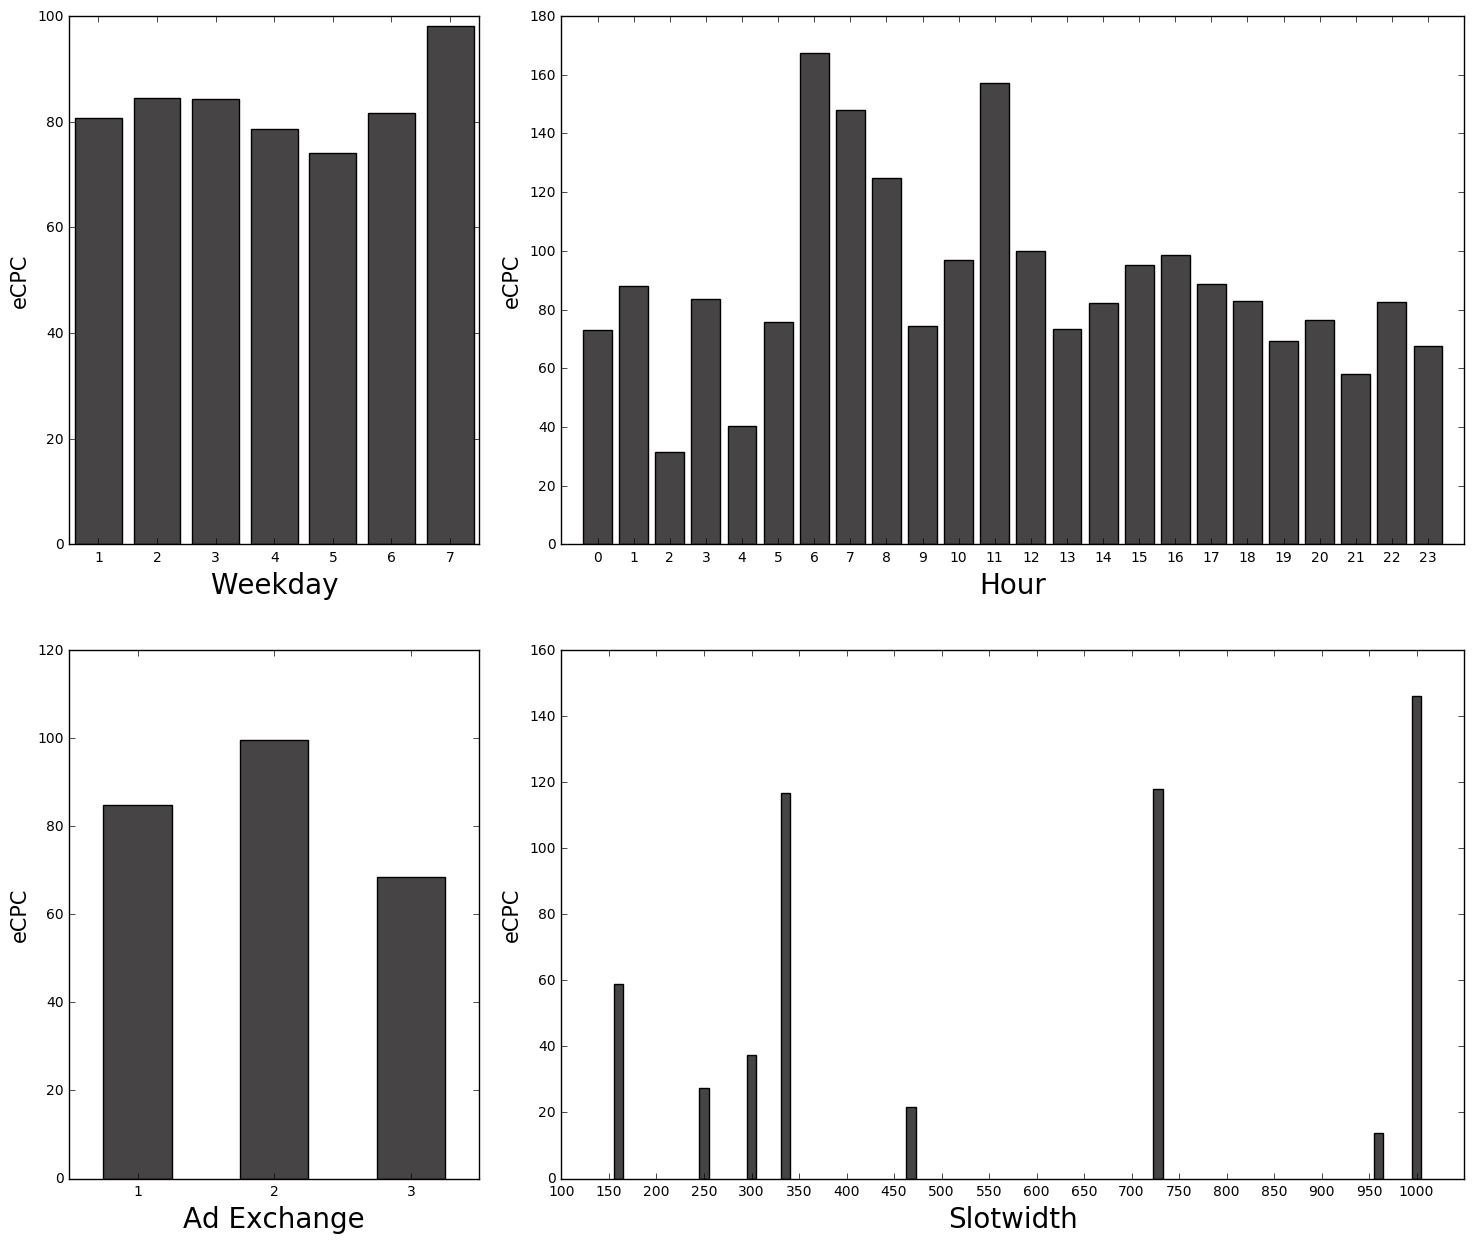

In [6]:
sick = train[train['advertiser'] == 1458]

fig=plt.figure(figsize=(18,15))


ax1 = plt.subplot2grid((2,3), (0,0), colspan=1)
plt.bar(range(1,8), basic_stat_1_week['payprice']*0.001/basic_stat_1_week['click'], align='center', color='#464445')
plt.xlim(0.5, 7.5)
ax1.set_xlabel('Weekday', fontsize=20)
ax1.set_ylabel('eCPC', fontsize=15)


ax2 = plt.subplot2grid((2,3), (0,1), colspan=2)
plt.bar(range(0,24), basic_stat_1_hour['payprice']*0.001/basic_stat_1_hour['click'], align='center', color='#464445')
plt.xlim(-1, 24)
ax2.set_xticks(range(0,24,1))
ax2.set_xlabel('Hour', fontsize=20)
ax2.set_ylabel('eCPC', fontsize=15)


ax4 = plt.subplot2grid((2,3), (1, 0), colspan=1)
plt.bar([1,2,3], basic_stat_1_ade['payprice']*0.001/basic_stat_1_ade['click'], width=0.5, align='center', color='#464445')
plt.xlim(0.5, 3.5)
plt.ylim(0, 120)
ax4.set_xticks([1,2,3])
ax4.set_xlabel('Ad Exchange', fontsize=20)
ax4.set_ylabel('eCPC', fontsize=15)


ax5 = plt.subplot2grid((2,3), (1, 1), colspan=2)
plt.bar([160, 250, 300, 336, 468, 728, 960, 1000], 0.001*sick.groupby(sick['slotwidth']).sum()['logtype'], width=10, align='center', color='#464445')
plt.xlim(100, 1050)
ax5.set_xticks(range(100,1050,50))
ax5.set_xlabel('Slotwidth', fontsize=20)
ax5.set_ylabel('eCPC', fontsize=15)


# plt.savefig('fig4.eps')

In [7]:
avg_payprice_for_each_ad = original_train[['payprice','advertiser']]
avg_payprice_for_each_ad = avg_payprice_for_each_ad.groupby(avg_payprice_for_each_ad.advertiser,as_index=False).mean()

avg_bidprice_for_each_ad = original_train[['bidprice','advertiser']]
avg_bidprice_for_each_ad = avg_bidprice_for_each_ad.groupby(avg_bidprice_for_each_ad.advertiser,as_index=False).mean()

In [8]:
# split os and browser
train['os'] = train['useragent'].map(lambda x: x.split('_')[0])
train['browser'] = train['useragent'].map(lambda x: x.split('_')[1])
    
test['os'] = test['useragent'].map(lambda x: x.split('_')[0])
test['browser'] = test['useragent'].map(lambda x: x.split('_')[1])

val['os'] = val['useragent'].map(lambda x: x.split('_')[0])
val['browser'] = val['useragent'].map(lambda x: x.split('_')[1])

In [9]:
train = train.drop('bidprice', axis=1)
train = train.drop('payprice', axis=1)
train = train.drop('click', axis=1)

val = val.drop('bidprice', axis=1)
val = val.drop('payprice', axis=1)
val = val.drop('click', axis=1)

In [10]:
# drop features 
drop_dict = ['bidid','logtype','userid','IP','url','urlid','usertag','domain','slotid','useragent','creative','keypage','city']

def drop_feature(df):
    for column in drop_dict:
        df = df.drop([column], axis=1)
    return df

train = drop_feature(train)
test = drop_feature(test)
val = drop_feature(val)

In [11]:
# replace missing values   
train['adexchange']     = train['adexchange'].replace('null', '5')
train['slotvisibility'] = train['slotvisibility'].replace('Na', '3')
train['slotformat']     = train['slotformat'].replace('Na', '0')

test['adexchange']      = test['adexchange'].replace('null', '5')
test['slotvisibility']  = test['slotvisibility'].replace('Na', '3')
test['slotformat']      = test['slotformat'].replace('Na', '0') 

val['adexchange']       = val['adexchange'].replace('null', '5')
val['slotvisibility']   = val['slotvisibility'].replace('Na', '3')
val['slotformat']       = val['slotformat'].replace('Na', '0')

In [12]:
# one-hot encoding
def onehot_column(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column_name)
    return dummies

cat_dict = ['weekday','hour','os','browser','region','adexchange','slotvisibility','slotformat','advertiser']

print('One')
for item in cat_dict:
    train = pd.concat([train, onehot_column(train, item)],axis=1)
    train = train.drop([item],axis=1)
    test = pd.concat([test, onehot_column(test, item)],axis=1)
    test = test.drop([item],axis=1)
    val = pd.concat([val, onehot_column(val, item)],axis=1)
    val = val.drop([item],axis=1)
    print('Work in progress...')
print('Done')

One
Work in progress...
Work in progress...
Work in progress...
Work in progress...
Work in progress...
Work in progress...
Work in progress...
Work in progress...
Work in progress...
Done


In [13]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [14]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(penalty='l2', 
                          dual=False, 
                          tol=0.0001, 
                          C=1.0, 
                          fit_intercept=True, 
                          intercept_scaling=1, 
                          class_weight=None, 
                          random_state=None, 
                          solver='liblinear', 
                          max_iter=100, 
                          multi_class='ovr', 
                          verbose=0, 
                          warm_start=False, 
                          n_jobs=1)

regressor.fit(train, y_click)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

y_pred = regressor.predict(val)
y_test = val_click

print("LR score validation set: ", rmse(y_test, y_pred))

LR score validation set:  0.0274584076378


In [16]:
ctr_pred = regressor.predict_proba(val)
ctr_pred = pd.DataFrame(ctr_pred)
avg_ctr_pred = ctr_pred[1].sum()/len(ctr_pred)
print('Predicted average CTR of validation set: ', avg_ctr_pred)
print('Actual average CTR of validation set:    ', val_click.sum()/len(val))

Predicted average CTR of validation set:  0.0007537752272653525
Actual average CTR of validation set:     0.0007539641500055046


In [17]:
p_ctr = pd.DataFrame(regressor.predict_proba(test))[1]
p_ctr_val = pd.DataFrame(regressor.predict_proba(val))[1]
# 3.3 linear
p_ctr_train = pd.DataFrame(regressor.predict_proba(train))[1]
avg_ctr_train = narrow_train.click.mean()

In [18]:
new_train=pd.concat([narrow_train,p_ctr_train/avg_ctr_train],axis=1)
new_train = new_train.rename(columns={1:'pDavgCTR'})
new_train.head()

,click,bidprice,payprice,advertiser,pDavgCTR
0,0,300,54,1458,1.238800
1,0,249,42,3476,0.740349
2,0,300,76,1458,0.891772
3,0,238,182,3427,1.453602
4,0,238,34,3476,0.292297


In [93]:
# 3.3 linear

ctr_train_linear=[]
click_train_linear=[]
spend_train_linear=[]
count_train_linear=[]
cpm_train_linear=[]
cpc_train_linear=[]
for value in range(10,301,1):
    
    ctr_train_linear.append(new_train[new_train.payprice<new_train.pDavgCTR*value].click.mean())
    spend_train_linear.append(new_train[new_train.payprice<new_train.pDavgCTR*value].payprice.sum()/1000)
    click_train_linear.append(new_train[new_train.payprice<new_train.pDavgCTR*value][new_train.click==1].click.count())
    count_train_linear.append(new_train[new_train.payprice<new_train.pDavgCTR*value].click.count())
    cpm_train_linear.append(spend_train_linear[-1]*1000/count_train_linear[-1])
    cpc_train_linear.append(spend_train_linear[-1]/click_train_linear[-1])
    
    
#     ctr_train_for_const.append(narrow_train[narrow_train.payprice<const].click.mean())
#     spend_train_for_const.append(narrow_train[narrow_train.payprice<const].payprice.sum()/1000)
#     click_train_for_const.append(narrow_train[narrow_train.payprice<const][narrow_train.click==1].click.count())
#     count_train_for_const.append(narrow_train[narrow_train.payprice<const].click.count())
#     cpm_train_for_const.append(spend_train_for_const[const-1]*1000/count_train_for_const[const-1])
#     cpc_train_for_const.append(spend_train_for_const[const-1]/click_train_for_const[const-1])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


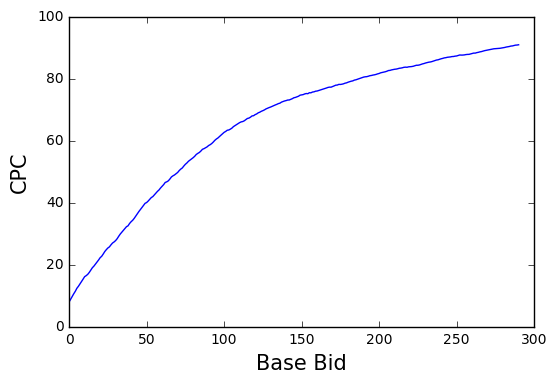

In [95]:
plt.plot(cpc_train_linear)
plt.xlabel('Base Bid', fontsize=15)
plt.ylabel('CPC', fontsize=15)
# plt.savefig('g_fig3.eps')

In [272]:
ctr_train_for_const=[]
click_train_for_const=[]
spend_train_for_const=[]
count_train_for_const=[]
cpm_train_for_const=[]
cpc_train_for_const=[]
    
for const in range(1,301):
    ctr_train_for_const.append(narrow_train[narrow_train.payprice<const].click.mean())
    spend_train_for_const.append(narrow_train[narrow_train.payprice<const].payprice.sum()/1000)
    click_train_for_const.append(narrow_train[narrow_train.payprice<const][narrow_train.click==1].click.count())
    count_train_for_const.append(narrow_train[narrow_train.payprice<const].click.count())
    cpm_train_for_const.append(spend_train_for_const[const-1]*1000/count_train_for_const[const-1])
    cpc_train_for_const.append(spend_train_for_const[const-1]/click_train_for_const[const-1])

/Users/NeiL/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


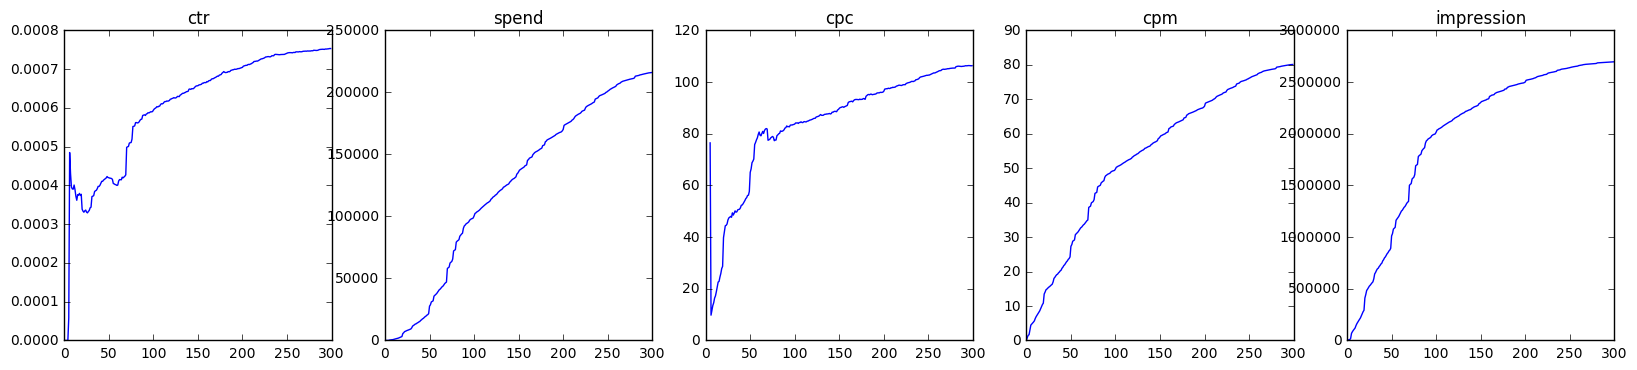

In [306]:
fig=plt.figure(figsize=(20,4),dpi=1600)
al=0.5
ax1=fig.add_subplot(151)
plt.plot(ctr_train_for_const)
plt.title('ctr')
ax2=fig.add_subplot(152)
plt.plot(spend_train_for_const)
plt.title('spend')
ax2=fig.add_subplot(153)
plt.plot(cpc_train_for_const)
plt.title('cpc')
ax3=fig.add_subplot(154)
plt.plot(cpm_train_for_const)
plt.title('cpm')
ax3=fig.add_subplot(155)
plt.plot(count_train_for_const)
plt.title('impression')

In [328]:
strategy_for_const=[]
for const in range(0,300):
    strategy_for_const.append(ctr_train_for_const[const]*120/0.0008-cpc_train_for_const[const])

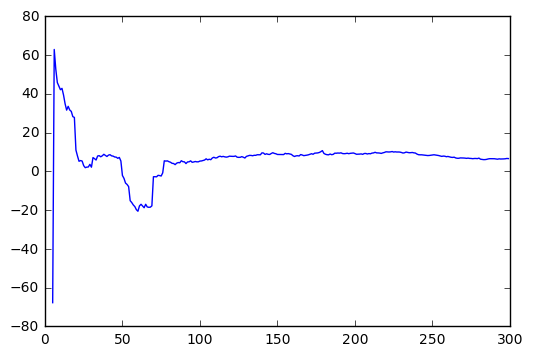

In [329]:
plt.plot(strategy_for_const)

In [19]:
lam = 0.00000052
ba=pd.DataFrame(p_ctr_train)
ba=ba.rename(columns = {1:'a'})
baf=('#cf5454','#f78633','#348aeb')

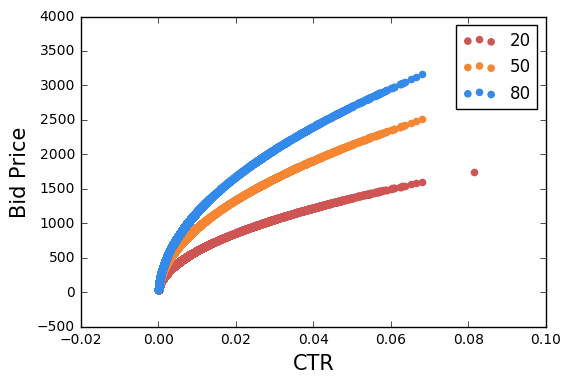

In [20]:
for index,c in enumerate((20,50,80)):    
    ab=(c/lam*p_ctr_train+c*c).apply(np.sqrt)-c
    ab=pd.DataFrame(ab)
    ab=ab.rename(columns = {1:c})
    ba=pd.concat([ba, ab],axis=1)
    plt.scatter(ba.a, ba[c], color=baf[index], label=c)
plt.xlabel('CTR', fontsize=15)
plt.ylabel('Bid Price', fontsize=15)
plt.legend(loc='best')

# plt.savefig('fig5.eps')

In [19]:
# lambda fixed; ctr/click/cpc against      c
#      c fixed; ctr/click/cpc against lambda
#   both with FULL budget

In [20]:
# ORTB1 for fixed lambda=0.00000052


budget=6250000
rg = range(30,141)
lamb = 0.00000052

cost_any=[]
ctr_any=[]
click_any=[]
count_any=[]
cpc_any=[]
cpm_any=[]

def jisuan(cost,costm,click,index,count):
    cost_any.append((cost-costm)/1000)
    ctr_any.append((click-narrow_val.get_value(index,'click'))/(count-1))       
    click_any.append(click-narrow_val.get_value(index,'click'))
    count_any.append(count-1)     
    cpm_any.append(cost_any[-1]*1000/count_any[-1])
    cpc_any.append(cost_any[-1]/click_any[-1])

def jisuanq(cost,costm,click,index,count):
    cost_any.append(cost/1000)
    ctr_any.append(click/count)       
    click_any.append(click)
    count_any.append(count)     
    cpm_any.append(cost_any[-1]*1000/count_any[-1])
    cpc_any.append(cost_any[-1]/click_any[-1])

cost_ea=0
count_ea=0
click_ea=0
cc=[0,0,0,0,0,0,0]
for c in rg:
    for index,costmoney in enumerate(narrow_val.payprice): 
        if costmoney < sqrt(c*ctr_pred.get_value(index,1)/lamb + c*c) - c:
            cost_ea=cost_ea+costmoney
            count_ea+=1
            click_ea+=narrow_val.get_value(index,'click')
        
        if cost_ea > budget:
            if cc[5]==0:
                cc[5]=1
                jisuan(cost_ea,costmoney,click_ea,index,count_ea) 
            break
        if index ==299748:    
            jisuanq(cost_ea,costmoney,click_ea,index,count_ea)
            break
    cc=[0,0,0,0,0,0,0]
    cost_ea=0
    count_ea=0
    click_ea=0

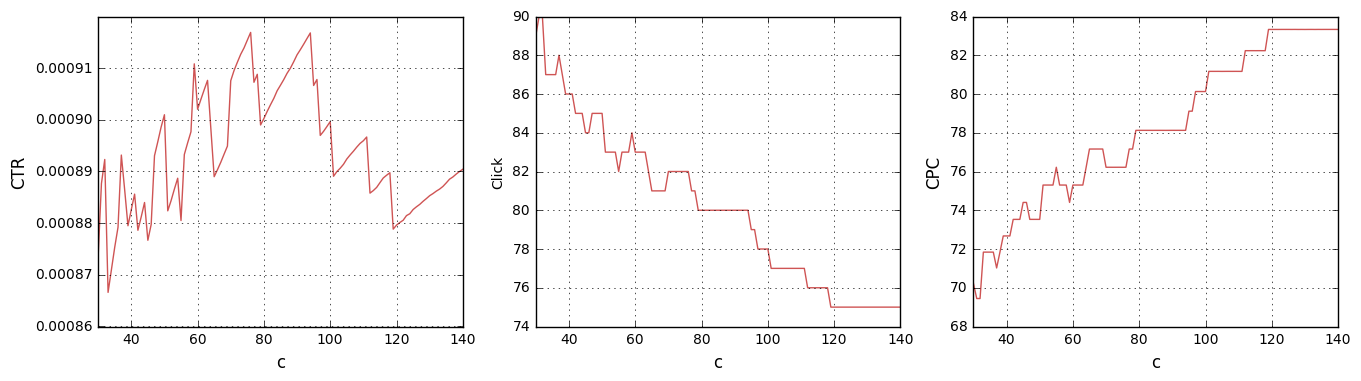

In [21]:
fig=plt.figure(figsize=(16,4),dpi=1600)
al=0.5

ax4=fig.add_subplot(131)
plt.plot(rg,ctr_any, color='#cf5454')
plt.xlim(30, 140)
plt.grid()
plt.xlabel('c', fontsize=12)
plt.ylabel('CTR', fontsize=12)

ax3=fig.add_subplot(132)
plt.plot(rg,click_any, color='#cf5454')
plt.xlim(30, 140)
plt.grid()
plt.xlabel('c', fontsize=12)
plt.ylabel('Click')

ax6=fig.add_subplot(133)
plt.plot(rg,cpc_any,color='#cf5454')
plt.xlim(30, 140)
plt.grid()
plt.xlabel('c', fontsize=12)
plt.ylabel('CPC', fontsize=12)
# plt.savefig('fig6.eps')

In [22]:
# ORTB1 for fixed c=76

budget=6250000
rg = range(1,101)
c = 76

cost_any=[]
ctr_any=[]
click_any=[]
count_any=[]
cpc_any=[]
cpm_any=[]

def jisuan(cost,costm,click,index,count):
    cost_any.append((cost-costm)/1000)
    ctr_any.append((click-narrow_val.get_value(index,'click'))/(count-1))       
    click_any.append(click-narrow_val.get_value(index,'click'))
    count_any.append(count-1)     
    cpm_any.append(cost_any[-1]*1000/count_any[-1])
    cpc_any.append(cost_any[-1]/click_any[-1])

def jisuanq(cost,costm,click,index,count):
    cost_any.append(cost/1000)
    ctr_any.append(click/count)       
    click_any.append(click)
    count_any.append(count)     
    cpm_any.append(cost_any[-1]*1000/count_any[-1])
    cpc_any.append(cost_any[-1]/click_any[-1])

cost_ea=0
count_ea=0
click_ea=0
cc=[0,0,0,0,0,0,0]
for lambb in rg:
    lamb = lambb * 0.0000001
    for index,costmoney in enumerate(narrow_val.payprice): 
        if costmoney < sqrt(c*ctr_pred.get_value(index,1)/lamb + c*c) - c:
            cost_ea=cost_ea+costmoney
            count_ea+=1
            click_ea+=narrow_val.get_value(index,'click')
        
        if cost_ea > budget:
            if cc[5]==0:
                cc[5]=1
                jisuan(cost_ea,costmoney,click_ea,index,count_ea) 
            break
        if index ==299748:    
            jisuanq(cost_ea,costmoney,click_ea,index,count_ea)
            break
    cc=[0,0,0,0,0,0,0]
    cost_ea=0
    count_ea=0
    click_ea=0

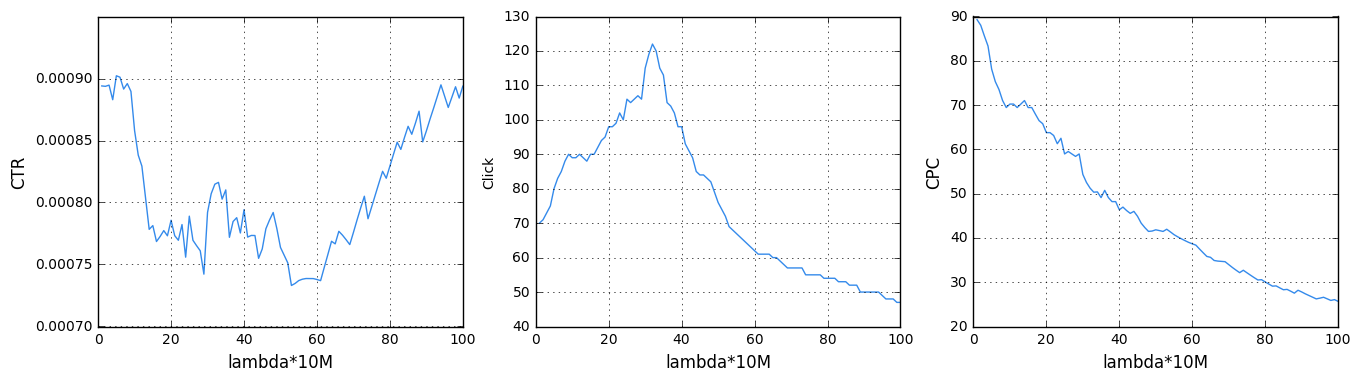

In [23]:
fig=plt.figure(figsize=(16,4),dpi=1600)
al=0.5
# ax1=fig.add_subplot(231)
# plt.plot(rg,cost_any)
# plt.xlabel('c')
# plt.ylabel('Cost')
# ax2=fig.add_subplot(232)
# plt.plot(rg,count_any)
# plt.xlabel('c')
# plt.ylabel('Impression')
ax4=fig.add_subplot(131)
plt.plot(rg,ctr_any, color='#348aeb')

plt.grid()
plt.xlabel('lambda*10M', fontsize=12)
plt.ylabel('CTR', fontsize=12)

ax3=fig.add_subplot(132)
plt.plot(rg,click_any, color='#348aeb')

plt.grid()
plt.xlabel('lambda*10M', fontsize=12)
plt.ylabel('Click')

# ax5=fig.add_subplot(235)
# plt.plot(rg,cpm_any)
# plt.xlabel('c')
# plt.ylabel('CPM')
ax6=fig.add_subplot(133)
plt.plot(rg,cpc_any,color='#348aeb')
plt.grid()
plt.xlabel('lambda*10M', fontsize=12)
plt.ylabel('CPC', fontsize=12)
# plt.savefig('fig7.eps')

In [249]:
# Considering CTR:
# optimal ORTB1 lambda = 4.6 * 10^(-7) 
# optimal ORTB1 c      = 58 


# Considering Click
# optimal ORTB1 lambda = 3.2 * 10^(-6) consdiering Click
# optimal ORTB1 c      = 76

In [121]:
# ORTB1 tunning

budget=6250000

lamb = 0.0000032
c = 76

cost_any=[]
ctr_any=[]
click_any=[]
count_any=[]
cpc_any=[]
cpm_any=[]

def jisuan(cost,costm,click,index,count):
    cost_any.append((cost-costm)/1000)
    ctr_any.append((click-narrow_val.get_value(index,'click'))/(count-1))       
    click_any.append(click-narrow_val.get_value(index,'click'))
    count_any.append(count-1)     
    cpm_any.append(cost_any[-1]*1000/count_any[-1])
    cpc_any.append(cost_any[-1]/click_any[-1])

def jisuanq(cost,costm,click,index,count):
    cost_any.append(cost/1000)
    ctr_any.append(click/count)       
    click_any.append(click)
    count_any.append(count)     
    cpm_any.append(cost_any[-1]*1000/count_any[-1])
    cpc_any.append(cost_any[-1]/click_any[-1])

cost_ea=0
count_ea=0
click_ea=0
cc=[0,0,0,0,0,0,0]

for index,costmoney in enumerate(narrow_val.payprice): 
    if costmoney < sqrt(c*ctr_pred.get_value(index,1)/lamb + c*c) - c:
        cost_ea=cost_ea+costmoney
        count_ea+=1
        click_ea+=narrow_val.get_value(index,'click')
        
    if cost_ea > budget:
        if cc[5]==0:
            cc[5]=1
            jisuan(cost_ea,costmoney,click_ea,index,count_ea) 
        break
    if index ==299748:    
        jisuanq(cost_ea,costmoney,click_ea,index,count_ea)
        break
cc=[0,0,0,0,0,0,0]
cost_ea=0
count_ea=0
click_ea=0
    
print('COST: ',cost_any)
print('COUNT: ',count_any)
print('CLICK: ',click_any)
print('CTR: ',ctr_any)
print('CPM: ',cpm_any)
print('CPC: ',cpc_any)

COST:  [6249.9930000000004]
COUNT:  [149738]
CLICK:  [122]
CTR:  [0.00081475644125071796]
CPM:  [41.739525037064737]
CPC:  [51.229450819672131]


In [71]:
# ORTB2 for fixed lambda=0.00000052

budget=6250000
rg = range(20,131)
lamb = 0.00000052

cost_any=[]
ctr_any=[]
click_any=[]
count_any=[]
cpc_any=[]
cpm_any=[]

cost_ea=0
count_ea=0
click_ea=0
cc=[0,0,0,0,0,0,0]
for c in rg:
    for index,costmoney in enumerate(narrow_val.payprice): 
        theta = ctr_pred.get_value(index,1)
        bid = c*(((theta+sqrt((c*lamb)**2 + theta**2))/(c*lamb))**(1/3) - ((c*lamb)/(theta+sqrt((c*lamb)**2 + theta**2))**(1/3)))
        if costmoney<bid:
            cost_ea=cost_ea+costmoney
            count_ea+=1
            click_ea+=narrow_val.get_value(index,'click')
        
        if cost_ea > budget:
            if cc[5]==0:
                cc[5]=1
                jisuan(cost_ea,costmoney,click_ea,index,count_ea) 
            break
        if index ==299748:    
            jisuanq(cost_ea,costmoney,click_ea,index,count_ea)
            break
    cc=[0,0,0,0,0,0,0]
    cost_ea=0
    count_ea=0
    click_ea=0

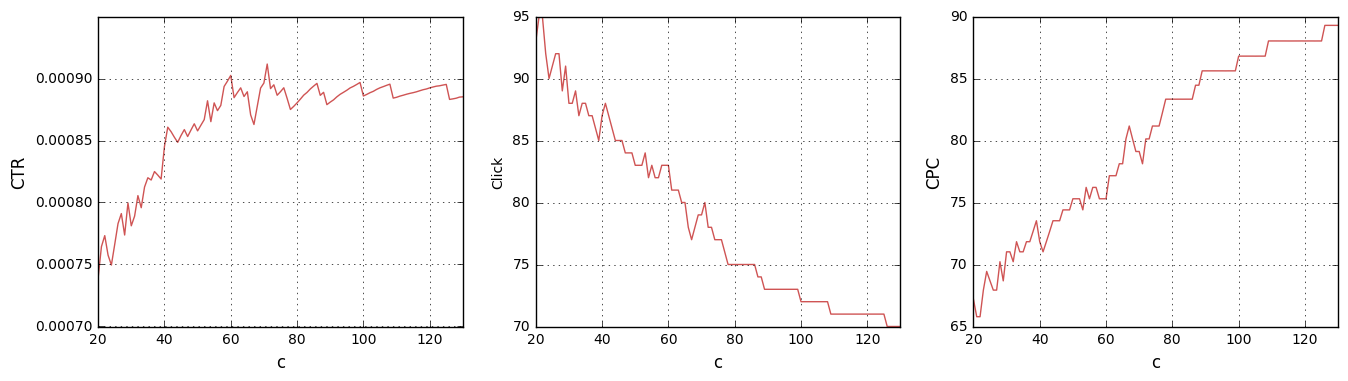

In [73]:
# ORTB2 plot when fixing lambda
fig=plt.figure(figsize=(16,4),dpi=1600)
al=0.5

ax4=fig.add_subplot(131)
plt.plot(rg,ctr_any, color='#cf5454')
plt.xlim(20, 130)
plt.grid()
plt.xlabel('c', fontsize=12)
plt.ylabel('CTR', fontsize=12)

ax3=fig.add_subplot(132)
plt.plot(rg,click_any, color='#cf5454')
plt.xlim(20, 130)
plt.grid()
plt.xlabel('c', fontsize=12)
plt.ylabel('Click')

ax6=fig.add_subplot(133)
plt.plot(rg,cpc_any,color='#cf5454')
plt.xlim(20, 130)
plt.grid()
plt.xlabel('c', fontsize=12)
plt.ylabel('CPC', fontsize=12)
plt.savefig('fig8.eps')

In [34]:
# ORTB2 for fixed c = 60


budget=6250000
rg = range(1,91)
c = 60

cost_any=[]
ctr_any=[]
click_any=[]
count_any=[]
cpc_any=[]
cpm_any=[]

cost_ea=0
count_ea=0
click_ea=0
cc=[0,0,0,0,0,0,0]
for lambb in rg:
    lamb = lambb * 0.0000001
    for index,costmoney in enumerate(narrow_val.payprice):
        theta = ctr_pred.get_value(index,1)
        bid = c*(((theta+sqrt((c*lamb)**2 + theta**2))/(c*lamb))**(1/3) - ((c*lamb)/(theta+sqrt((c*lamb)**2 + theta**2))**(1/3)))
        if costmoney<bid:
            cost_ea=cost_ea+costmoney
            count_ea+=1
            click_ea+=narrow_val.get_value(index,'click')
        
        if cost_ea > budget:
            if cc[5]==0:
                cc[5]=1
                jisuan(cost_ea,costmoney,click_ea,index,count_ea) 
            break
        if index ==299748:    
            jisuanq(cost_ea,costmoney,click_ea,index,count_ea)
            break
    cc=[0,0,0,0,0,0,0]
    cost_ea=0
    count_ea=0
    click_ea=0

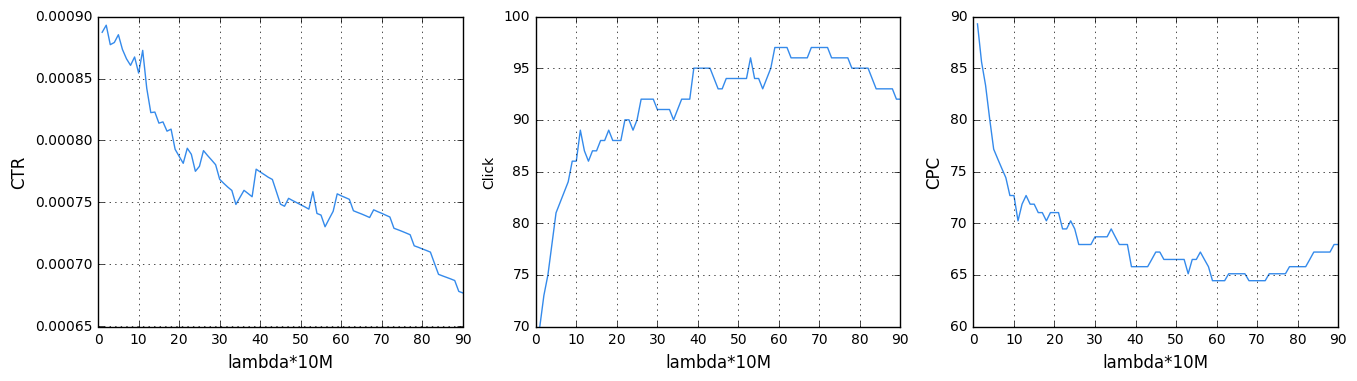

In [35]:
fig=plt.figure(figsize=(16,4),dpi=1600)
al=0.5
# ax1=fig.add_subplot(231)
# plt.plot(rg,cost_any)
# plt.xlabel('c')
# plt.ylabel('Cost')
# ax2=fig.add_subplot(232)
# plt.plot(rg,count_any)
# plt.xlabel('c')
# plt.ylabel('Impression')
ax4=fig.add_subplot(131)
plt.plot(rg,ctr_any, color='#348aeb')

plt.grid()
plt.xlabel('lambda*10M', fontsize=12)
plt.ylabel('CTR', fontsize=12)

ax3=fig.add_subplot(132)
plt.plot(rg,click_any, color='#348aeb')

plt.grid()
plt.xlabel('lambda*10M', fontsize=12)
plt.ylabel('Click')

# ax5=fig.add_subplot(235)
# plt.plot(rg,cpm_any)
# plt.xlabel('c')
# plt.ylabel('CPM')
ax6=fig.add_subplot(133)
plt.plot(rg,cpc_any,color='#348aeb')
plt.grid()
plt.xlabel('lambda*10M', fontsize=12)
plt.ylabel('CPC', fontsize=12)
plt.savefig('fig9.eps')

In [80]:
# optimal ORTB2 lambda = 1.49 * 10^(-6) consdiering Click
# optimal ORTB2 c      = 20

In [120]:
# ORTB2 tunning

budget=6250000

lamb = 0.00000149
c = 20

cost_any=[]
ctr_any=[]
click_any=[]
count_any=[]
cpc_any=[]
cpm_any=[]

def jisuan(cost,costm,click,index,count):
    cost_any.append((cost-costm)/1000)
    ctr_any.append((click-narrow_val.get_value(index,'click'))/(count-1))       
    click_any.append(click-narrow_val.get_value(index,'click'))
    count_any.append(count-1)     
    cpm_any.append(cost_any[-1]*1000/count_any[-1])
    cpc_any.append(cost_any[-1]/click_any[-1])

def jisuanq(cost,costm,click,index,count):
    cost_any.append(cost/1000)
    ctr_any.append(click/count)       
    click_any.append(click)
    count_any.append(count)     
    cpm_any.append(cost_any[-1]*1000/count_any[-1])
    cpc_any.append(cost_any[-1]/click_any[-1])

cost_ea=0
count_ea=0
click_ea=0
cc=[0,0,0,0,0,0,0]

for index,costmoney in enumerate(narrow_val.payprice): 
    theta = ctr_pred.get_value(index,1)
    bid = c*(((theta+sqrt((c*lamb)**2 + theta**2))/(c*lamb))**(1/3) - ((c*lamb)/(theta+sqrt((c*lamb)**2 + theta**2))**(1/3)))
    if costmoney < bid:
        cost_ea=cost_ea+costmoney
        count_ea+=1
        click_ea+=narrow_val.get_value(index,'click')
        
    if cost_ea > budget:
        if cc[5]==0:
            cc[5]=1
            jisuan(cost_ea,costmoney,click_ea,index,count_ea) 
        break
    if index ==299748:    
        jisuanq(cost_ea,costmoney,click_ea,index,count_ea)
        break
cc=[0,0,0,0,0,0,0]
cost_ea=0
count_ea=0
click_ea=0
    
print('COST: ',cost_any)
print('COUNT: ',count_any)
print('CLICK: ',click_any)
print('CTR: ',ctr_any)
print('CPM: ',cpm_any)
print('CPC: ',cpc_any)

COST:  [6240.3249999999998]
COUNT:  [160476]
CLICK:  [106]
CTR:  [0.00066053490864677582]
CPM:  [38.886344375482935]
CPC:  [58.870990566037733]


In [129]:
newwval=pd.concat([narrow_val,ctr_pred],axis=1)
newwval = newwval.rename(columns={1:'pCTR'})

,click,bidprice,payprice,advertiser,0,pCTR
0,0,227,102,3427,0.999464,0.000536
1,0,277,118,2997,0.994657,0.005343
2,0,241,77,3427,0.999059,0.000941
3,0,241,77,3427,0.999237,0.000763
4,0,300,178,3386,0.999676,0.000324


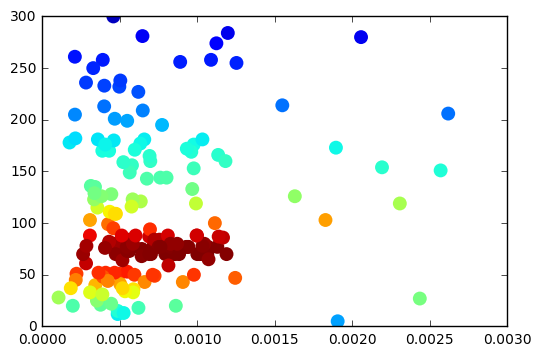

In [335]:
from scipy.stats import gaussian_kde

mmmm=newwval[newwval.click==1]
xy = np.vstack([mmmm.pCTR,mmmm.payprice])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(mmmm.pCTR, mmmm.payprice, c=z, s=100, edgecolor='',label='Click')
plt.xlim(hha, 0.003)
plt.ylim(0, 300)
plt.show()


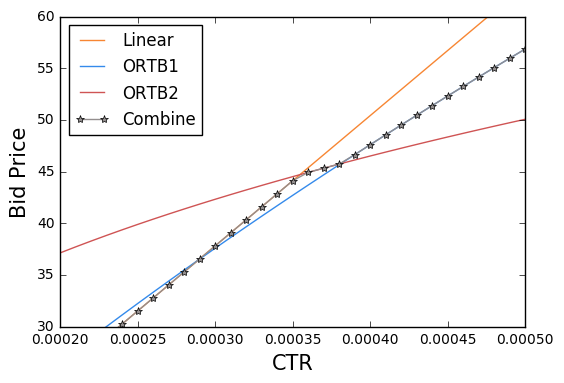

In [292]:
hh=101
ha=100000
hha=0.0002
hhh=0.0005
# hha=0.00033
# hhh=0.00038
theta=[]
lids=[]
for tc in range(0,hh):  
    theta.append(tc/ha)
    lids.append(theta[tc]*95/avg_ctr_pred)
plt.plot(theta,lids,color='#f78633', label='Linear')
c = 76
lam= 0.0000032
theta=[]
abds=[]
for tc in range(0,hh):  
    theta.append(tc/ha)
    abds.append(sqrt(c/lam*theta[tc]+c*c)-c)
plt.plot(theta,abds,color='#348aeb', label='ORTB1')
lam = 0.00000149
c = 20
theta=[]
bidds=[]
for tc in range(0,hh):  
    theta.append(tc/ha)
    bidds.append(c*(((theta[tc]+sqrt((c*lamb)**2 + theta[tc]**2))/(c*lamb))**(1/3) - ((c*lamb)/(theta[tc]+sqrt((c*lamb)**2 + theta[tc]**2))**(1/3))))
plt.plot(theta,bidds,color='#cf5454', label='ORTB2')

lam = 0.00000149
c = 20
c2 = 76
lam2= 0.0000032
theta=[]
bidpircec=[]
for tc in range(0,hh):
    theta.append(tc/ha)
    if theta[tc]<0.00036: 
        bidpircec.append(theta[tc]*95/avg_ctr_pred)
    elif theta[tc]<0.00039: 
        bidpircec.append(c*(((theta[tc]+sqrt((c*lamb)**2 + theta[tc]**2))/(c*lamb))**(1/3) - ((c*lamb)/(theta[tc]+sqrt((c*lamb)**2 + theta[tc]**2))**(1/3))))
    else:
        bidpircec.append(sqrt(c2*theta[tc]/lamb2 + c2*c2) - c2)
plt.plot(theta,bidpircec,'-*',color='#938e8e', label='Combine')

plt.xlim(hha, hhh)
plt.ylim(30, 60)
plt.xlabel('CTR', fontsize=15)
plt.ylabel('Bid Price', fontsize=15)
plt.legend(loc='best')

plt.savefig('g_fig7.eps')

In [254]:
# ORTB1 tunning

budget=6250000



cost_any=[]
ctr_any=[]
click_any=[]
count_any=[]
cpc_any=[]
cpm_any=[]

def jisuan(cost,costm,click,index,count):
    cost_any.append((cost-costm)/1000)
    ctr_any.append((click-narrow_val.get_value(index,'click'))/(count-1))       
    click_any.append(click-narrow_val.get_value(index,'click'))
    count_any.append(count-1)     
    cpm_any.append(cost_any[-1]*1000/count_any[-1])
    cpc_any.append(cost_any[-1]/click_any[-1])

def jisuanq(cost,costm,click,index,count):
    cost_any.append(cost/1000)
    ctr_any.append(click/count)       
    click_any.append(click)
    count_any.append(count)     
    cpm_any.append(cost_any[-1]*1000/count_any[-1])
    cpc_any.append(cost_any[-1]/click_any[-1])

cost_ea=0
count_ea=0
click_ea=0
cc=[0,0,0,0,0,0,0]

lam = 0.00000149
c = 20
lamb2 = 0.0000032
c2 = 76

for index,costmoney in enumerate(narrow_val.payprice): 
    theta=ctr_pred.get_value(index,1)

    if theta<0.000342: 
        bidpircecc=theta*95/avg_ctr_pred
    elif theta<0.000390: 
        bidpircecc=c*(((theta+sqrt((c*lamb)**2 + theta**2))/(c*lamb))**(1/3) - ((c*lamb)/(theta+sqrt((c*lamb)**2 + theta**2))**(1/3)))
    else:
        bidpircecc=sqrt(c2*theta/lamb2 + c2*c2) - c2
        
    if costmoney < bidpircecc:
        cost_ea=cost_ea+costmoney
        count_ea+=1
        click_ea+=narrow_val.get_value(index,'click')
        
    if cost_ea > budget:
        if cc[5]==0:
            cc[5]=1
            jisuan(cost_ea,costmoney,click_ea,index,count_ea) 
        break
    if index ==299748:    
        jisuanq(cost_ea,costmoney,click_ea,index,count_ea)
        break
cc=[0,0,0,0,0,0,0]
cost_ea=0
count_ea=0
click_ea=0
    
print('COST: ',cost_any)
print('COUNT: ',count_any)
print('CLICK: ',click_any)
print('CTR: ',ctr_any)
print('CPM: ',cpm_any)
print('CPC: ',cpc_any)
print(index)

COST:  [6249.9369999999999]
COUNT:  [149604]
CLICK:  [122]
CTR:  [0.00081548621694607095]
CPM:  [41.776536723617014]
CPC:  [51.228991803278689]
297077


In [293]:
p_ctr_test = pd.DataFrame(regressor.predict_proba(test))[1]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


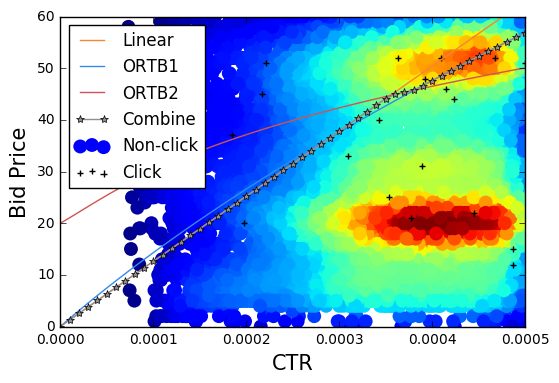

In [326]:
from scipy.stats import gaussian_kde

mmmm=newwval[newwval.click==0][newwval.payprice<=60][newwval.pCTR<=0.0005][0:10000]

xy = np.vstack([mmmm.pCTR,mmmm.payprice])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(mmmm.pCTR, mmmm.payprice, c=z, s=100, edgecolor='',label='Non-click')


mmmm=newwval[newwval.click==1][newwval.payprice<=60][newwval.pCTR<=0.0005]
plt.scatter(mmmm.pCTR,mmmm.payprice,color='#000000',label='Click',marker='+')

hh=101
ha=100000
hha=0#.0002
hhh=0.0005
# hha=0.00033
# hhh=0.00038
theta=[]
lids=[]
for tc in range(0,hh):  
    theta.append(tc/ha)
    lids.append(theta[tc]*95/avg_ctr_pred)
plt.plot(theta,lids,color='#f78633', label='Linear')
c = 76
lam= 0.0000032
theta=[]
abds=[]
for tc in range(0,hh):  
    theta.append(tc/ha)
    abds.append(sqrt(c/lam*theta[tc]+c*c)-c)
plt.plot(theta,abds,color='#348aeb', label='ORTB1')
lam = 0.00000149
c = 20
theta=[]
bidds=[]
for tc in range(0,hh):  
    theta.append(tc/ha)
    bidds.append(c*(((theta[tc]+sqrt((c*lamb)**2 + theta[tc]**2))/(c*lamb))**(1/3) - ((c*lamb)/(theta[tc]+sqrt((c*lamb)**2 + theta[tc]**2))**(1/3))))
plt.plot(theta,bidds,color='#cf5454', label='ORTB2')

lam = 0.00000149
c = 20
c2 = 76
lam2= 0.0000032
theta=[]
bidpircec=[]
for tc in range(0,hh):
    theta.append(tc/ha)
    if theta[tc]<0.00036: 
        bidpircec.append(theta[tc]*95/avg_ctr_pred)
    elif theta[tc]<0.00039: 
        bidpircec.append(c*(((theta[tc]+sqrt((c*lamb)**2 + theta[tc]**2))/(c*lamb))**(1/3) - ((c*lamb)/(theta[tc]+sqrt((c*lamb)**2 + theta[tc]**2))**(1/3))))
    else:
        bidpircec.append(sqrt(c2*theta[tc]/lamb2 + c2*c2) - c2)
plt.plot(theta,bidpircec,'-*',color='#938e8e', label='Combine')

plt.xlim(hha, hhh)
plt.ylim(0, 60)
plt.xlabel('CTR', fontsize=15)
plt.ylabel('Bid Price', fontsize=15)
plt.legend(loc='upper left')
plt.show()
plt.savefig('g_fig8.eps')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


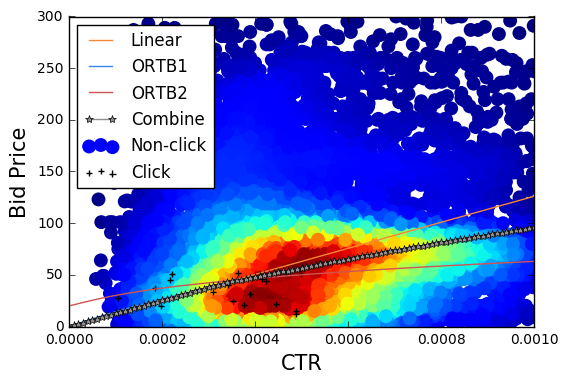

In [330]:
from scipy.stats import gaussian_kde

mmmm=newwval[newwval.click==0][newwval.payprice<=300][newwval.pCTR<=0.001][0:10000]

xy = np.vstack([mmmm.pCTR,mmmm.payprice])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(mmmm.pCTR, mmmm.payprice, c=z, s=100, edgecolor='',label='Non-click')


mmmm=newwval[newwval.click==1][newwval.payprice<=60][newwval.pCTR<=0.0005]
plt.scatter(mmmm.pCTR,mmmm.payprice,color='#000000',label='Click',marker='+')

hh=101
ha=100000
hha=0#.0002
hhh=0.001
# hha=0.00033
# hhh=0.00038
theta=[]
lids=[]
for tc in range(0,hh):  
    theta.append(tc/ha)
    lids.append(theta[tc]*95/avg_ctr_pred)
plt.plot(theta,lids,color='#f78633', label='Linear')
c = 76
lam= 0.0000032
theta=[]
abds=[]
for tc in range(0,hh):  
    theta.append(tc/ha)
    abds.append(sqrt(c/lam*theta[tc]+c*c)-c)
plt.plot(theta,abds,color='#348aeb', label='ORTB1')
lam = 0.00000149
c = 20
theta=[]
bidds=[]
for tc in range(0,hh):  
    theta.append(tc/ha)
    bidds.append(c*(((theta[tc]+sqrt((c*lamb)**2 + theta[tc]**2))/(c*lamb))**(1/3) - ((c*lamb)/(theta[tc]+sqrt((c*lamb)**2 + theta[tc]**2))**(1/3))))
plt.plot(theta,bidds,color='#cf5454', label='ORTB2')

lam = 0.00000149
c = 20
c2 = 76
lam2= 0.0000032
theta=[]
bidpircec=[]
for tc in range(0,hh):
    theta.append(tc/ha)
    if theta[tc]<0.00036: 
        bidpircec.append(theta[tc]*95/avg_ctr_pred)
    elif theta[tc]<0.00039: 
        bidpircec.append(c*(((theta[tc]+sqrt((c*lamb)**2 + theta[tc]**2))/(c*lamb))**(1/3) - ((c*lamb)/(theta[tc]+sqrt((c*lamb)**2 + theta[tc]**2))**(1/3))))
    else:
        bidpircec.append(sqrt(c2*theta[tc]/lamb2 + c2*c2) - c2)
plt.plot(theta,bidpircec,'-*',color='#938e8e', label='Combine')

plt.xlim(hha, hhh)
plt.ylim(0, 300)
plt.xlabel('CTR', fontsize=15)
plt.ylabel('Bid Price', fontsize=15)
plt.legend(loc='upper left')
plt.show()
plt.savefig('g_fig8.eps')

In [353]:
avg_ctr_test = p_ctr_test.sum()/299748

In [365]:
bid_price = pd.DataFrame(p_ctr_test)
bid_price = bid_price.rename(columns = {1:'bidprice'})
bid_price = pd.concat([original_test['bidid'], bid_price], axis=1)

In [366]:
c1 = 76
lamb1 = 0.0000032

c2 = 20
lamb2 = 0.00000149


bidbb=[]
for ctr in bid_price['bidprice']:
    if ctr < 0.000342:
        bidbb.append(95*ctr/avg_ctr_test)
    elif ctr < 0.00039:
        bidbb.append(c2*(((ctr+sqrt((c2*lamb2)**2 + ctr**2))/(c2*lamb2))**(1/3) - ((c2*lamb2)/(ctr+sqrt((c2*lamb2)**2 + ctr**2))**(1/3))))
    else:
        bidbb.append(sqrt(c1*ctr/lamb1 + c1*c1) - c1)


In [367]:
jajaj= pd.DataFrame(bidbb)
bid_price['bidprice'] = jajaj

In [376]:
bid_price.to_csv('bidprice.csv', header=True)